In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
from google.colab.data_table import DataTable
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
DataTable.max_columns = 99

Mounted at /content/drive


Read del dataSet prezzi del carburante da Drive

In [3]:
path_carburanti = '/content/drive/Shareddrives/Progetto Big Data/DataSet Puliti/prix-des-carburants-cleaned.csv'
df_carburanti = pd.read_csv(path_carburanti, sep = ';') #ds andamento prezzi dei carburanti

Read dei dataSet da GitHub

In [4]:
url_prix = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/prix-consommation_cleaned.csv'
url_1er_leg = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/legislatives-2022-1er-tour_cleaned.csv'
url_1er_pres = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/presidentielles-2022-1er-tour_cleaned.csv'
url_2nd_pres = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/presidentielles-2022-2nd-tour_cleaned.csv'
url_vax = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/covid-19-france-vaccinations-age-sexe-dep_cleaned.csv'
url_job = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/labouref-france-departement-quarter-jobseeker_cleaned.csv'
url_tcrd = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/TCRD_025.csv'
url_inflazione = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/inflazionePerDipartimento.csv'
url_pib = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/PIBPerDipartimento.csv'
df_prix = pd.read_csv(url_prix, sep = ';') #ds andamento prezzi al consumo
df_1er_pres = pd.read_csv(url_1er_pres, sep = ';') #ds primo turno presidenziali
df_2nd_pres = pd.read_csv(url_2nd_pres, sep = ';') #ds secondo turno presidenziali
df_1er_leg = pd.read_csv(url_1er_leg, sep = ';') #ds primo turno legislative
df_vax = pd.read_csv(url_vax, sep = ';') #ds vaccinazioni covid
df_job = pd.read_csv(url_job, sep = ';') #ds disoccupazione
df_tcrd = pd.read_csv(url_tcrd, sep = ',') #ds disoccupazione per dipartimento
df_inflazione = pd.read_csv(url_inflazione, sep = ',') #ds inflazione per dipartimento
df_pib = pd.read_csv(url_pib, sep = ',') #ds reddito per dipartimento

<ipython-input-4-dc30c5596a9a>:11: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1er_pres = pd.read_csv(url_1er_pres, sep = ';') #ds primo turno presidenziali
<ipython-input-4-dc30c5596a9a>:13: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1er_leg = pd.read_csv(url_1er_leg, sep = ';') #ds primo turno legislative


FILTRAGGIO SU ABITANTI FRANCESI CHE VIVONO ALL'ESTERO PER CSV PRESIDENZIALI PRIMO E SECONDO TURNO

In [5]:
#ulteriore filtraggio per 'Français établis hors de France'
condizione = df_1er_pres['Libellé du département'] == 'Français établis hors de France'
df_1er_pres.drop(df_1er_pres[condizione].index, inplace = True)
condizione2 = df_2nd_pres['Libellé du département'] == 'Français établis hors de France'
df_2nd_pres.drop(df_2nd_pres[condizione2].index, inplace = True)

# Correlazioni

### Cambio tipi di dato

In [6]:
df_job[['Trimestre','Catégorie','Tranche d\'âge','Nom Officiel Région','Code Iso 3166-3 Zone','Nom Officiel Département','Code Officiel Département']] = df_job[['Trimestre','Catégorie','Tranche d\'âge','Nom Officiel Région','Code Iso 3166-3 Zone','Nom Officiel Département','Code Officiel Département']].astype("string")
df_job['Période'] = df_job['Période'].astype('int64')
df_job['Date'] = pd.to_datetime(df_job['Date'])
df_job.rename(columns={'Tranche d\'âge': 'Tranche_dage','Nom Officiel Département':'Libellé du département', 'Code Officiel Département':'Code du département'}, inplace = True)

In [7]:
df_vax[['Nom Officiel Région','Code Iso 3166-3 Zone','Nom Officiel Département','Code Officiel Département']] = df_vax[['Nom Officiel Région','Code Iso 3166-3 Zone','Nom Officiel Département','Code Officiel Département']].astype("string")
df_vax['Date'] = pd.to_datetime(df_vax['Date'])
df_vax.rename(columns={'Nom Officiel Département':'Libellé du département'}, inplace = True)

In [8]:
df_pib[['Libellé du département','Code du département']] = df_pib[['Libellé du département','Code du département']].astype("string")

In [9]:
df_tcrd[['Libellé du département','Code du département']] = df_tcrd[['Libellé du département','Code du département']].astype("string")

In [10]:
df_inflazione[["Code du département", "Libellé du département",'Nom Officiel Région']] = df_inflazione[[
    "Code du département", "Libellé du département",'Nom Officiel Région']].astype("string")

In [11]:
def cambiaTipo(df):
  df[['Code du département','Code de la commune', 'Code du b.vote']] = df[['Code du département','Code de la commune', 'Code du b.vote']].astype("string")
  df[['Libellé du département','Libellé de la circonscription', 'Libellé de la commune',
    'Sexe','Nom','Prénom','Nom Officiel Région','scrutin_code']] = df[['Libellé du département','Libellé de la circonscription', 'Libellé de la commune',
                                                        'Sexe','Nom','Prénom','Nom Officiel Région','scrutin_code']].astype("string")
  return df

In [12]:
df_1er_pres = cambiaTipo(df_1er_pres)
df_1er_leg = cambiaTipo(df_1er_leg)
df_2er_pres = cambiaTipo(df_2nd_pres)

### Definizione funzione correlazione percentuale voti candidato per dipartimento primo turno e csv necessario

In [13]:
#funzione correlazione percentuale voti candidato per dipartimento primo turno e csv necessario
def getCorrVoixCsvPerc(nome, dataset):
    df_filtered = df_1er_pres[df_1er_pres['Nom'] == nome]
    df_leg = df_filtered[['Nom', 'Libellé du département','Exprimés','Voix','% Voix/Exp']].sort_values('Libellé du département')
    percentuale_per_dipartimento = df_leg.groupby('Libellé du département')[['Exprimés','Voix']].sum().sort_values(['Libellé du département'])
    df = (percentuale_per_dipartimento['Voix'] / percentuale_per_dipartimento['Exprimés'])*100
    percentuale_per_dipartimento['% Voix/Exp'] = df
    percentuale_per_dipartimento = percentuale_per_dipartimento.rename(columns={'% Voix/Exp': '% Voix/Exp ' + nome})
    df_merged = pd.merge(percentuale_per_dipartimento, dataset, on='Libellé du département')
    return df_merged

### Definizione delle funzioni per il calcolo del valore della correlazione

In [14]:
def getForzaCorrelazione(valore):
    valoreAbs = abs(valore)
    if 0 <= valoreAbs <= 0.19:
        return "very weak"
    elif 0.2 <= valoreAbs <= 0.39:
        return "weak"
    elif 0.4 <= valoreAbs <= 0.59:
        return "moderate"
    elif 0.6 <= valoreAbs <= 0.79:
        return "strong"
    elif 0.8 <= valoreAbs <= 1:
        return "very strong"

def getSegnoCorrelazione(valore):
    if valore > 0:
        return 'positive'
    return 'negative'

In [15]:
def getPvalue(colonna1, colonna2):
    pearson_coef, p_value = stats.pearsonr(colonna1, colonna2)
    esito = ''
    if(p_value < 0.001):
        esito = 'There is strong evidence that the correlation is significant'
        return pearson_coef,p_value,esito
    if(p_value < 0.05):
        esito = 'There is moderate evidence that the correlation is significant'
        return pearson_coef,p_value,esito
    if(p_value < 0.1):
        esito = 'There is weak evidence that the correlation is significant'
        return pearson_coef,p_value,esito
    if(p_value > 0.1):
        esito = 'There is no evidence that the correlation is significant'
    return pearson_coef,p_value,esito

def getEsito(colonna1, colonna2):
    pearson_coef,p_value,esito = getPvalue(colonna1, colonna2)
    print('The correlation is :',getForzaCorrelazione(pearson_coef),getSegnoCorrelazione(pearson_coef))
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value,'\n'+esito)

## 1) Correlazioni tra dipartimenti e voto MACRON

### 1.1) Correlazione tra voto a Macron nel primo turno e reddito pro capite

The correlation is : moderate positive
The Pearson Correlation Coefficient is 0.42071442871119064  with a P-value of P = 0.0023484242802594034 
There is moderate evidence that the correlation is significant


,% Voix/Exp MACRON,PIB en valeur sont à prix courants
% Voix/Exp MACRON,1.000000,0.420714
PIB en valeur sont à prix courants,0.420714,1.000000


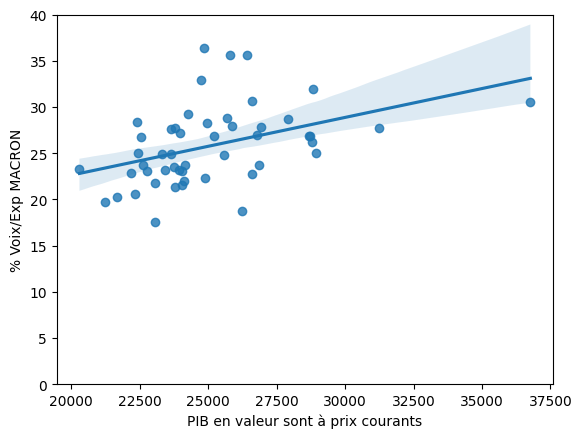

In [ ]:
df_corr_M_pib = getCorrVoixCsvPerc('MACRON', df_pib)
df_corr_M_pib
sns.regplot(y="% Voix/Exp MACRON", x="PIB en valeur sont à prix courants", data=df_corr_M_pib)
plt.ylim(0,)
getEsito(df_corr_M_pib['% Voix/Exp MACRON'], df_corr_M_pib['PIB en valeur sont à prix courants'])
df_corr_M_pib[['% Voix/Exp MACRON', 'PIB en valeur sont à prix courants']].corr()

### 1.2) Correlazione tra voto a Macron nel primo turno e disoccupazione

<ipython-input-217-278ef913011c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]


The correlation is : strong negative
The Pearson Correlation Coefficient is -0.6743104061055603  with a P-value of P = 2.2722118482029534e-08 
There is strong evidence that the correlation is significant


,% Voix/Exp MACRON,% Taux de chômage département T4
% Voix/Exp MACRON,1.00000,-0.67431
% Taux de chômage département T4,-0.67431,1.00000


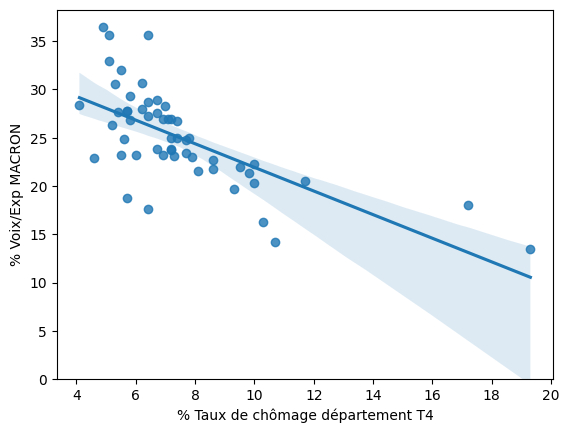

In [ ]:
df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]
df_tassoDis_per_dipartimento = (pd.merge(df_job_filtred, df_tcrd, on='Libellé du département'))
df_corr_M_dis = getCorrVoixCsvPerc('MACRON', df_tassoDis_per_dipartimento)
df_corr_M_dis
sns.regplot(y="% Voix/Exp MACRON", x="% Taux de chômage département T4", data=df_corr_M_dis)
plt.ylim(0,)
getEsito(df_corr_M_dis['% Voix/Exp MACRON'], df_corr_M_dis['% Taux de chômage département T4'])
df_corr_M_dis[['% Voix/Exp MACRON', '% Taux de chômage département T4']].corr()

### 1.3) Correlazione tra voto a Macron nel primo turno e tasso di vaccinazione

In [ ]:
tasso_vacc_per_dip = (df_vax[['Libellé du département', 'Couverture vaccinale complète (dose n°2)']]).sort_values('Libellé du département').sort_values(by = ['Couverture vaccinale complète (dose n°2)'], ascending = False)
tasso_vacc_per_dip

,Libellé du département,Couverture vaccinale complète (dose n°2)
7,Saint-Barthélemy,86.3
17,Vendée,84.7
31,Charente-Maritime,84.6
32,Landes,83.8
53,Cantal,83.1
29,Deux-Sèvres,82.4
30,Allier,81.8
36,Mayenne,81.8
45,Sarthe,81.6
6,Charente,81.5


The correlation is : strong positive
The Pearson Correlation Coefficient is 0.6975554557809392  with a P-value of P = 3.263200863694533e-09 
There is strong evidence that the correlation is significant


,% Voix/Exp MACRON,Couverture vaccinale complète (dose n°2)
% Voix/Exp MACRON,1.000000,0.697555
Couverture vaccinale complète (dose n°2),0.697555,1.000000


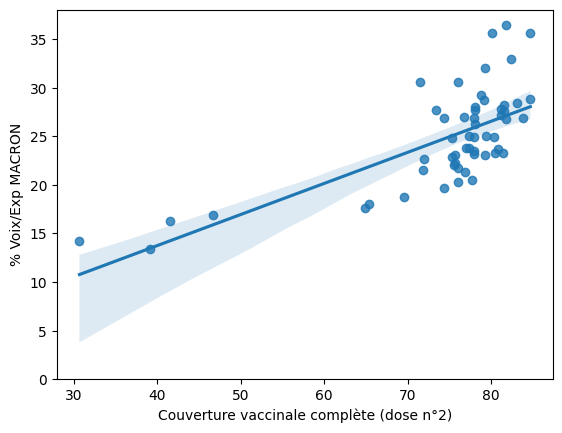

In [ ]:
df_corr_M_vax = getCorrVoixCsvPerc('MACRON', tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp MACRON", x="Couverture vaccinale complète (dose n°2)", data=df_corr_M_vax)
plt.ylim(0,)
getEsito(df_corr_M_vax['% Voix/Exp MACRON'], df_corr_M_vax['Couverture vaccinale complète (dose n°2)'])
df_corr_M_vax[['% Voix/Exp MACRON', 'Couverture vaccinale complète (dose n°2)']].corr()

## 2) Correlazioni tra dipartimenti e voto LE PEN

### 2.1) Esiste una correlazione, in un dato dipartimento, tra voto a Le Pen nel primo turno e reddito dichiarato pro capite?

The correlation is : weak negative
The Pearson Correlation Coefficient is -0.33614243486817563  with a P-value of P = 0.017001579442682085 
There is moderate evidence that the correlation is significant


,% Voix/Exp LE PEN,PIB en valeur sont à prix courants
% Voix/Exp LE PEN,1.000000,-0.336142
PIB en valeur sont à prix courants,-0.336142,1.000000


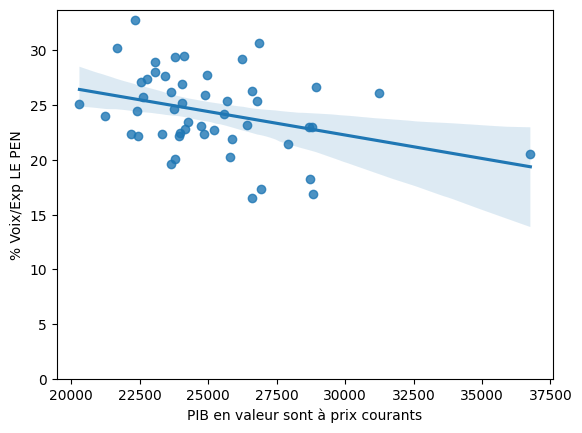

In [ ]:
df_corr_LP_pib = getCorrVoixCsvPerc('LE PEN', df_pib)
df_corr_LP_pib
sns.regplot(y="% Voix/Exp LE PEN", x="PIB en valeur sont à prix courants", data=df_corr_LP_pib)
plt.ylim(0,)
getEsito(df_corr_LP_pib['% Voix/Exp LE PEN'], df_corr_LP_pib['PIB en valeur sont à prix courants'])
df_corr_LP_pib[['% Voix/Exp LE PEN', 'PIB en valeur sont à prix courants']].corr()

### 2.2)Esiste una correlazione, in un dato dipartimento, tra voto a Le Pen nel primo turno e disoccupazione?

<ipython-input-221-506e14db771b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]


The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.04796920509576456  with a P-value of P = 0.7305075008153219 
There is no evidence that the correlation is significant


,% Voix/Exp LE PEN,% Taux de chômage département T4
% Voix/Exp LE PEN,1.000000,0.047969
% Taux de chômage département T4,0.047969,1.000000


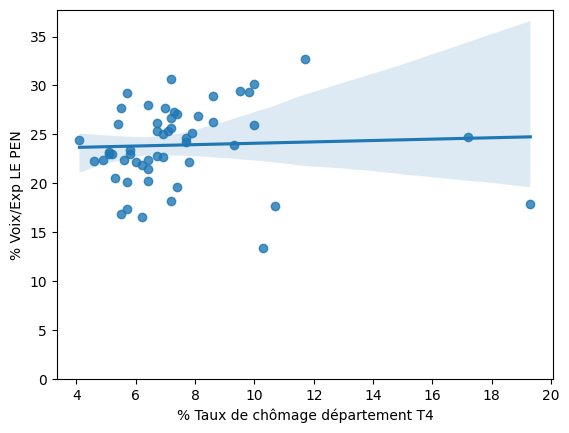

In [ ]:
df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]
df_tassoDis_per_dipartimento = (pd.merge(df_job_filtred, df_tcrd, on='Libellé du département'))
df_corr_LP_dis = getCorrVoixCsvPerc('LE PEN', df_tassoDis_per_dipartimento)
df_corr_LP_dis
sns.regplot(y="% Voix/Exp LE PEN", x="% Taux de chômage département T4", data=df_corr_LP_dis)
plt.ylim(0,)
getEsito(df_corr_LP_dis['% Voix/Exp LE PEN'], df_corr_LP_dis['% Taux de chômage département T4'])
df_corr_LP_dis[['% Voix/Exp LE PEN', '% Taux de chômage département T4']].corr()

### 2.3)Esiste una correlazione, in un dato dipartimento, tra voto a Le Pen nel primo turno e tasso di vaccinazione?

In [ ]:
tasso_vacc_per_dip = (df_vax[['Libellé du département', 'Couverture vaccinale complète (dose n°2)']]).sort_values('Libellé du département').sort_values(by = ['Couverture vaccinale complète (dose n°2)'], ascending = False)
tasso_vacc_per_dip

,Libellé du département,Couverture vaccinale complète (dose n°2)
7,Saint-Barthélemy,86.3
17,Vendée,84.7
31,Charente-Maritime,84.6
32,Landes,83.8
53,Cantal,83.1
29,Deux-Sèvres,82.4
30,Allier,81.8
36,Mayenne,81.8
45,Sarthe,81.6
6,Charente,81.5


The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.07668676350495314  with a P-value of P = 0.5778815029933669 
There is no evidence that the correlation is significant


,% Voix/Exp LE PEN,Couverture vaccinale complète (dose n°2)
% Voix/Exp LE PEN,1.000000,0.076687
Couverture vaccinale complète (dose n°2),0.076687,1.000000


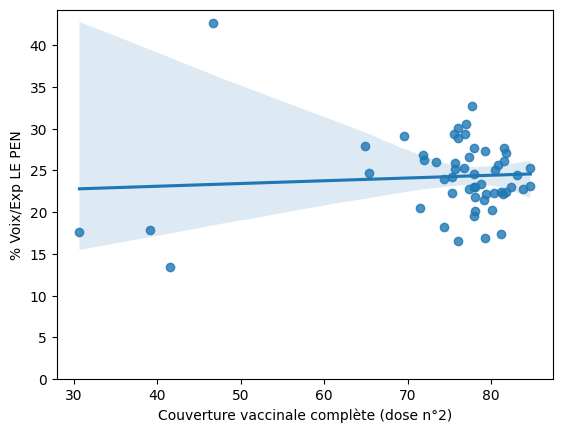

In [ ]:
df_corr_LP_vax = getCorrVoixCsvPerc('LE PEN', tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp LE PEN", x="Couverture vaccinale complète (dose n°2)", data=df_corr_LP_vax)
plt.ylim(0,)
getEsito(df_corr_LP_vax['% Voix/Exp LE PEN'], df_corr_LP_vax['Couverture vaccinale complète (dose n°2)'])
df_corr_LP_vax[['% Voix/Exp LE PEN', 'Couverture vaccinale complète (dose n°2)']].corr()
#df_LP_vax

## 3) Correlazioni tra dipartimenti e voto MELENCHON

### 3.1)Esiste una correlazione, in un dato dipartimento, tra voto a Melenchon nel primo turno e reddito dichiarato pro capite?

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.00031496623397002767  with a P-value of P = 0.9982679414821967 
There is no evidence that the correlation is significant


,% Voix/Exp MÉLENCHON,PIB en valeur sont à prix courants
% Voix/Exp MÉLENCHON,1.000000,0.000315
PIB en valeur sont à prix courants,0.000315,1.000000


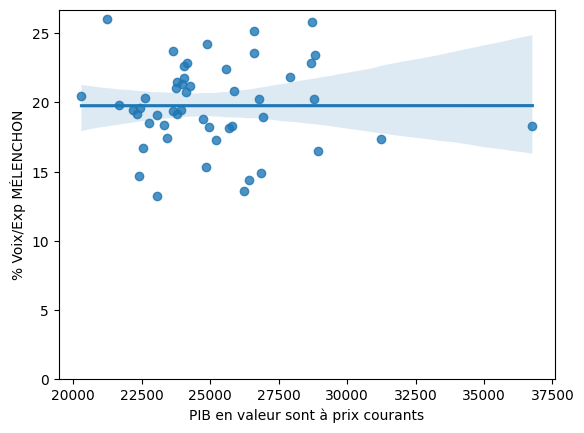

In [ ]:
df_corr_MEL_pib = getCorrVoixCsvPerc('MÉLENCHON', df_pib)
df_corr_MEL_pib
sns.regplot(y="% Voix/Exp MÉLENCHON", x="PIB en valeur sont à prix courants", data=df_corr_MEL_pib)
plt.ylim(0,)
getEsito(df_corr_MEL_pib['% Voix/Exp MÉLENCHON'], df_corr_MEL_pib['PIB en valeur sont à prix courants'])
df_corr_MEL_pib[['% Voix/Exp MÉLENCHON', 'PIB en valeur sont à prix courants']].corr()

### 3.2)Esiste una correlazione, in un dato dipartimento, tra voto a Melenchon nel primo turno e disoccupazione?

<ipython-input-225-1ac67cc84c0a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]


The correlation is : strong positive
The Pearson Correlation Coefficient is 0.7332540683811073  with a P-value of P = 2.8766516217744196e-10 
There is strong evidence that the correlation is significant


,% Voix/Exp MÉLENCHON,% Taux de chômage département T4
% Voix/Exp MÉLENCHON,1.000000,0.733254
% Taux de chômage département T4,0.733254,1.000000


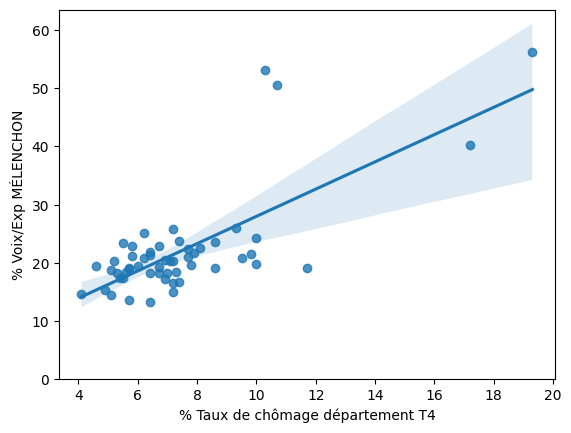

In [ ]:
df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]
df_tassoDis_per_dipartimento = (pd.merge(df_job_filtred, df_tcrd, on='Libellé du département'))
df_corr_JLM_dis = getCorrVoixCsvPerc('MÉLENCHON', df_tassoDis_per_dipartimento)
df_corr_JLM_dis
sns.regplot(y="% Voix/Exp MÉLENCHON", x="% Taux de chômage département T4", data=df_corr_JLM_dis)
plt.ylim(0,)
getEsito(df_corr_JLM_dis['% Voix/Exp MÉLENCHON'], df_corr_JLM_dis['% Taux de chômage département T4'])
df_corr_JLM_dis[['% Voix/Exp MÉLENCHON', '% Taux de chômage département T4']].corr()

#### 3.3) Esiste una correlazione, in un dato dipartimento, tra voto a Melenchon nel primo turno e tasso di vaccinazione?

In [ ]:
tasso_vacc_per_dip = (df_vax[['Libellé du département', 'Couverture vaccinale complète (dose n°2)']]).sort_values('Libellé du département').sort_values(by = ['Couverture vaccinale complète (dose n°2)'], ascending = False)
tasso_vacc_per_dip

,Libellé du département,Couverture vaccinale complète (dose n°2)
7,Saint-Barthélemy,86.3
17,Vendée,84.7
31,Charente-Maritime,84.6
32,Landes,83.8
53,Cantal,83.1
29,Deux-Sèvres,82.4
30,Allier,81.8
36,Mayenne,81.8
45,Sarthe,81.6
6,Charente,81.5


The correlation is : very strong negative
The Pearson Correlation Coefficient is -0.8226906300215756  with a P-value of P = 1.3155437519815789e-14 
There is strong evidence that the correlation is significant


,% Voix/Exp MÉLENCHON,Couverture vaccinale complète (dose n°2)
% Voix/Exp MÉLENCHON,1.000000,-0.822691
Couverture vaccinale complète (dose n°2),-0.822691,1.000000


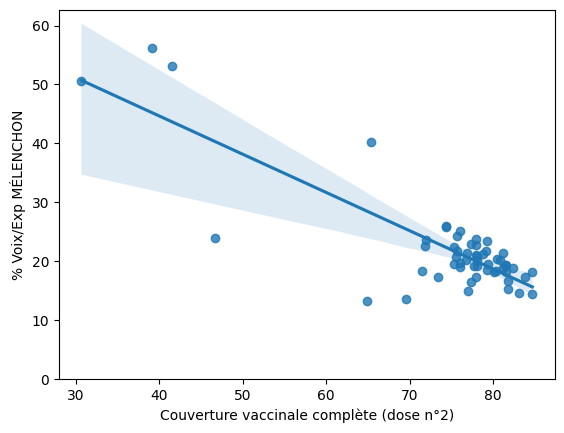

In [ ]:
df_corr_JML_vax = getCorrVoixCsvPerc('MÉLENCHON', tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp MÉLENCHON", x="Couverture vaccinale complète (dose n°2)", data=df_corr_JML_vax)
plt.ylim(0,)
getEsito(df_corr_JML_vax['% Voix/Exp MÉLENCHON'], df_corr_JML_vax['Couverture vaccinale complète (dose n°2)'])
df_corr_JML_vax[['% Voix/Exp MÉLENCHON', 'Couverture vaccinale complète (dose n°2)']].corr()


## 4) Correlazioni tra dipartimenti e voto Ensemble/RN/Nupes/LR

### Definizione funzione correlazione percentuale tra voto legislative primo turno e csv necessario

In [16]:
def getCorrVoixVaxPerc(nome,dataset):
    df_filtered = df_1er_leg[df_1er_leg['Nuance'] == nome]
    df_leg = df_filtered[['Nom','Nuance', 'Libellé du département','Exprimés','Voix','% Voix/Exp']].sort_values('Libellé du département')
    percentuale_per_dipartimento = df_leg.groupby('Libellé du département')[['Exprimés','Voix']].sum().sort_values(['Libellé du département'])
    df = (percentuale_per_dipartimento['Voix'] / percentuale_per_dipartimento['Exprimés'])*100
    percentuale_per_dipartimento['% Voix/Exp'] = df
    percentuale_per_dipartimento = percentuale_per_dipartimento.rename(columns={'% Voix/Exp': '% Voix/Exp ' + nome})
    df_merged = pd.merge(percentuale_per_dipartimento, dataset, on='Libellé du département')
    return df_merged



### 4.1) Correlazione tra primo turno delle legislative e reddito pro capite

#### 4.1.1.Correlazione tra Ensemble e reddito pro capite

The correlation is : weak positive
The Pearson Correlation Coefficient is 0.33941062642033515  with a P-value of P = 0.015893475587123295 
There is moderate evidence that the correlation is significant


,% Voix/Exp ENS,PIB en valeur sont à prix courants
% Voix/Exp ENS,1.000000,0.339411
PIB en valeur sont à prix courants,0.339411,1.000000


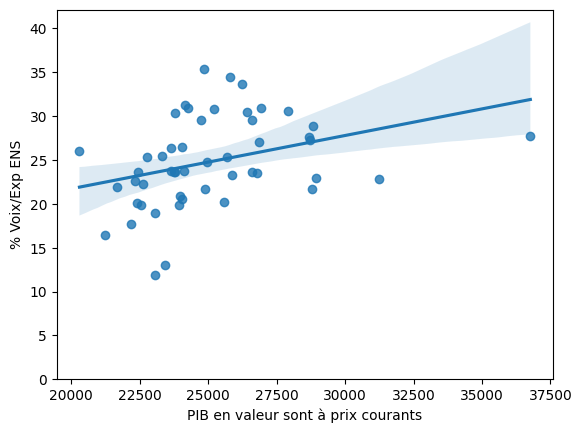

In [ ]:
df_ens_pib = getCorrVoixVaxPerc('ENS',df_pib)
sns.regplot(y="% Voix/Exp ENS", x="PIB en valeur sont à prix courants", data=df_ens_pib)
plt.ylim(0,)
getEsito(df_ens_pib['% Voix/Exp ENS'], df_ens_pib['PIB en valeur sont à prix courants'])
df_ens_pib[['% Voix/Exp ENS', 'PIB en valeur sont à prix courants']].corr()

#### 4.1.2.Correlazione tra RN e reddito pro capite

The correlation is : very weak negative
The Pearson Correlation Coefficient is -0.150163774694744  with a P-value of P = 0.2979320791791552 
There is no evidence that the correlation is significant


,% Voix/Exp RN,PIB en valeur sont à prix courants
% Voix/Exp RN,1.000000,-0.150164
PIB en valeur sont à prix courants,-0.150164,1.000000


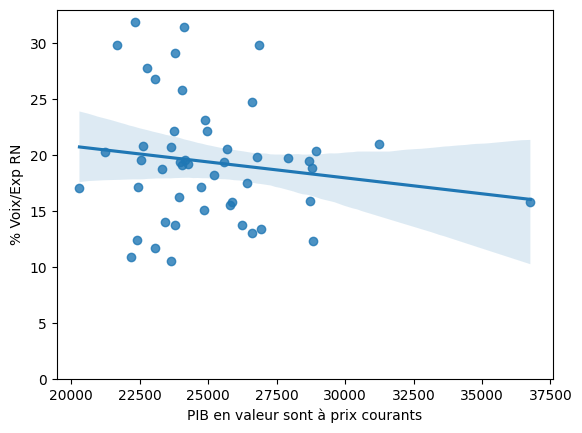

In [ ]:
df_RN_pib = getCorrVoixVaxPerc('RN',df_pib)
sns.regplot(y="% Voix/Exp RN", x="PIB en valeur sont à prix courants", data=df_RN_pib)
plt.ylim(0,)
getEsito(df_RN_pib['% Voix/Exp RN'], df_RN_pib['PIB en valeur sont à prix courants'])
df_RN_pib[['% Voix/Exp RN', 'PIB en valeur sont à prix courants']].corr()

#### 4.1.3.Correlazione tra Nupes e reddito pro capite

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.03407949592608381  with a P-value of P = 0.8181285882657957 
There is no evidence that the correlation is significant


,% Voix/Exp NUP,PIB en valeur sont à prix courants
% Voix/Exp NUP,1.000000,0.034079
PIB en valeur sont à prix courants,0.034079,1.000000


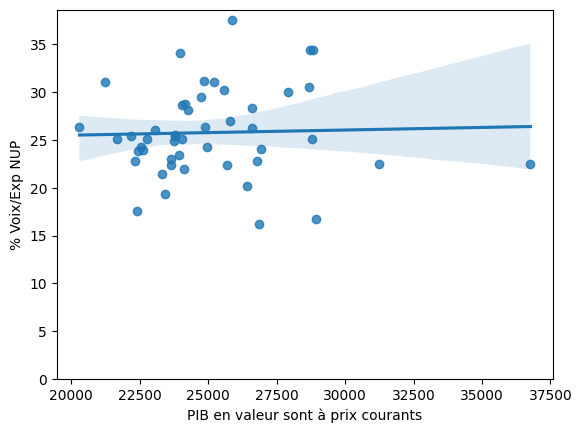

In [ ]:
df_NUP_pib = getCorrVoixVaxPerc('NUP',df_pib)
sns.regplot(y="% Voix/Exp NUP", x="PIB en valeur sont à prix courants", data=df_NUP_pib)
plt.ylim(0,)
getEsito(df_NUP_pib['% Voix/Exp NUP'], df_NUP_pib['PIB en valeur sont à prix courants'])
df_NUP_pib[['% Voix/Exp NUP', 'PIB en valeur sont à prix courants']].corr()

#### 4.1.4.Correlazione tra LR e reddito pro capite

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.028349840935933804  with a P-value of P = 0.8550534353969792 
There is no evidence that the correlation is significant


,% Voix/Exp LR,PIB en valeur sont à prix courants
% Voix/Exp LR,1.00000,0.02835
PIB en valeur sont à prix courants,0.02835,1.00000


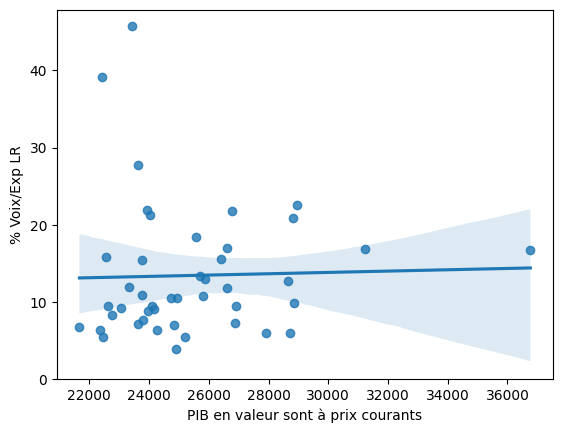

In [ ]:
df_LR_pib = getCorrVoixVaxPerc('LR',df_pib)
sns.regplot(y="% Voix/Exp LR", x="PIB en valeur sont à prix courants", data=df_LR_pib)
plt.ylim(0,)
getEsito(df_LR_pib['% Voix/Exp LR'], df_LR_pib['PIB en valeur sont à prix courants'])
df_LR_pib[['% Voix/Exp LR', 'PIB en valeur sont à prix courants']].corr()

### 4.2) Correlazione tra primo turno delle legislative e disoccupazione

#### filtraggio del dataset tasso di disoccupazione

In [ ]:
df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]
df_tassoDis_per_dipartimento = (pd.merge(df_job_filtred, df_tcrd, on='Libellé du département'))

<ipython-input-233-25d35a6ebd1e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_job_filtred = df_job[(df_job.Période == 2022)][(df_job.Trimestre == 'T4')][(df_job.Tranche_dage == 'Indifférent')][(df_job.Catégorie == 'ABC')][['Libellé du département', 'Nb moyen demandeur emploi']]


#### 4.2.1.Correlazione tra Ensemble e disoccupazione

The correlation is : weak negative
The Pearson Correlation Coefficient is -0.3545985778621756  with a P-value of P = 0.008516424831516054 
There is moderate evidence that the correlation is significant


,% Voix/Exp ENS,% Taux de chômage département T4
% Voix/Exp ENS,1.000000,-0.354599
% Taux de chômage département T4,-0.354599,1.000000


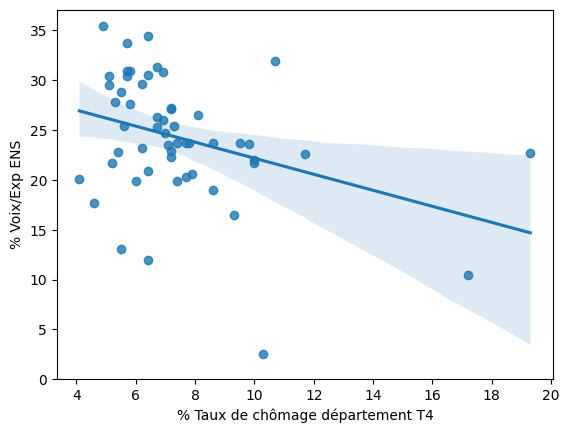

In [ ]:
df_ens_tassoDis = getCorrVoixVaxPerc('ENS',df_tassoDis_per_dipartimento)
sns.regplot(y="% Voix/Exp ENS", x="% Taux de chômage département T4", data=df_ens_tassoDis)
plt.ylim(0,)
getEsito(df_ens_tassoDis['% Voix/Exp ENS'], df_ens_tassoDis['% Taux de chômage département T4'])
df_ens_tassoDis[['% Voix/Exp ENS', '% Taux de chômage département T4']].corr()

#### 4.2.2.Correlazione tra RN e disoccupazione

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.06239865715736391  with a P-value of P = 0.6539780651663838 
There is no evidence that the correlation is significant


,% Voix/Exp RN,% Taux de chômage département T4
% Voix/Exp RN,1.000000,0.062399
% Taux de chômage département T4,0.062399,1.000000


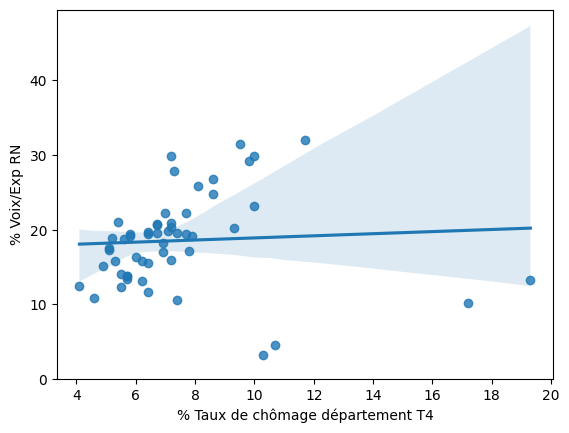

In [ ]:
df_RN_tassoDis = getCorrVoixVaxPerc('RN',df_tassoDis_per_dipartimento)
sns.regplot(y="% Voix/Exp RN", x="% Taux de chômage département T4", data=df_RN_tassoDis)
plt.ylim(0,)
getEsito(df_RN_tassoDis['% Voix/Exp RN'], df_RN_tassoDis['% Taux de chômage département T4'])
df_RN_tassoDis[['% Voix/Exp RN', '% Taux de chômage département T4']].corr()

#### 4.2.3.Correlazione tra Nupes e disoccupazione

The correlation is : very weak negative
The Pearson Correlation Coefficient is -0.00909209235777364  with a P-value of P = 0.9510942992975729 
There is no evidence that the correlation is significant


,% Voix/Exp NUP,% Taux de chômage département T4
% Voix/Exp NUP,1.000000,-0.009092
% Taux de chômage département T4,-0.009092,1.000000


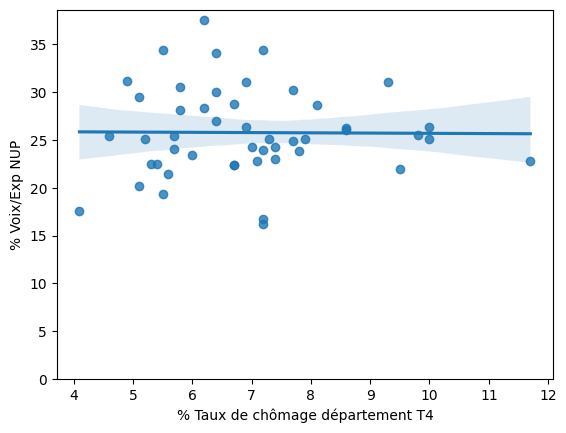

In [ ]:
df_NUP_tassoDis = getCorrVoixVaxPerc('NUP',df_tassoDis_per_dipartimento)
sns.regplot(y="% Voix/Exp NUP", x="% Taux de chômage département T4", data=df_NUP_tassoDis)
plt.ylim(0,)
getEsito(df_NUP_tassoDis['% Voix/Exp NUP'], df_NUP_tassoDis['% Taux de chômage département T4'])
df_NUP_tassoDis[['% Voix/Exp NUP', '% Taux de chômage département T4']].corr()

#### 4.2.3.Correlazione tra LR e disoccupazione

The correlation is : weak negative
The Pearson Correlation Coefficient is -0.3240247831529861  with a P-value of P = 0.026289395463738537 
There is moderate evidence that the correlation is significant


,% Voix/Exp LR,% Taux de chômage département T4
% Voix/Exp LR,1.000000,-0.324025
% Taux de chômage département T4,-0.324025,1.000000


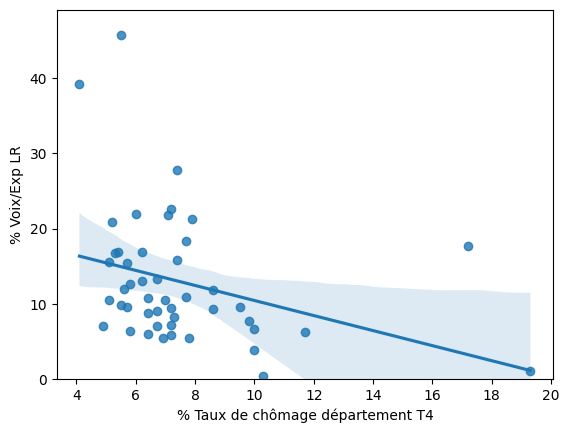

In [ ]:
df_LR_tassoDis = getCorrVoixVaxPerc('LR',df_tassoDis_per_dipartimento)
sns.regplot(y="% Voix/Exp LR", x="% Taux de chômage département T4", data=df_LR_tassoDis)
plt.ylim(0,)
getEsito(df_LR_tassoDis['% Voix/Exp LR'], df_LR_tassoDis['% Taux de chômage département T4'])
df_LR_tassoDis[['% Voix/Exp LR', '% Taux de chômage département T4']].corr()

### 4.3) Correlazione tra primo turno delle legislative e tasso di vaccinazione

In [ ]:
tasso_vacc_per_dip = (df_vax[['Libellé du département', 'Couverture vaccinale complète (dose n°2)']]).sort_values('Libellé du département').sort_values(by = ['Couverture vaccinale complète (dose n°2)'], ascending = False)
tasso_vacc_per_dip

,Libellé du département,Couverture vaccinale complète (dose n°2)
7,Saint-Barthélemy,86.3
17,Vendée,84.7
31,Charente-Maritime,84.6
32,Landes,83.8
53,Cantal,83.1
29,Deux-Sèvres,82.4
30,Allier,81.8
36,Mayenne,81.8
45,Sarthe,81.6
6,Charente,81.5


#### 4.3.1.Correlazione tra Ensemble e tasso di vaccinazione

The correlation is : weak positive
The Pearson Correlation Coefficient is 0.3350726496910808  with a P-value of P = 0.01239696578195953 
There is moderate evidence that the correlation is significant


,% Voix/Exp ENS,Couverture vaccinale complète (dose n°2)
% Voix/Exp ENS,1.000000,0.335073
Couverture vaccinale complète (dose n°2),0.335073,1.000000


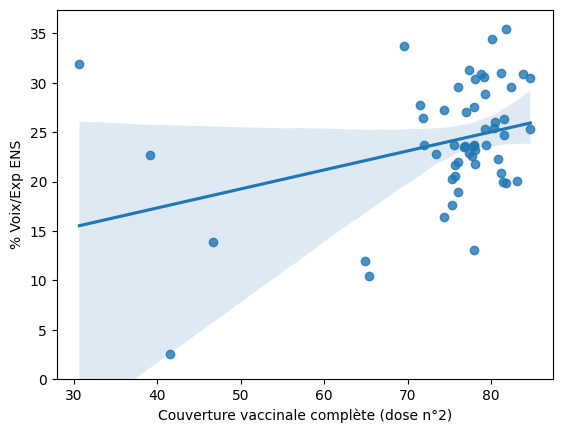

In [ ]:
df_ens_vax = getCorrVoixVaxPerc('ENS',tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp ENS", x="Couverture vaccinale complète (dose n°2)", data=df_ens_vax)
plt.ylim(0,)
getEsito(df_ens_vax['% Voix/Exp ENS'], df_ens_vax['Couverture vaccinale complète (dose n°2)'])
df_ens_vax[['% Voix/Exp ENS', 'Couverture vaccinale complète (dose n°2)']].corr()

#### 4.3.2.Correlazione tra RN e tasso di vaccinazione

The correlation is : moderate positive
The Pearson Correlation Coefficient is 0.502770898431569  with a P-value of P = 9.160017085982429e-05 
There is strong evidence that the correlation is significant


,% Voix/Exp RN,Couverture vaccinale complète (dose n°2)
% Voix/Exp RN,1.000000,0.502771
Couverture vaccinale complète (dose n°2),0.502771,1.000000


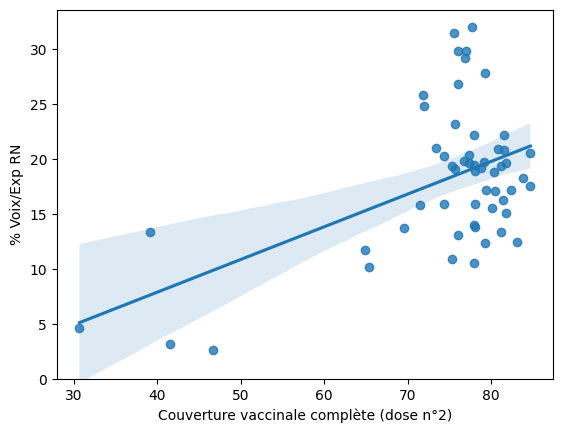

In [ ]:
df_rn_vax = getCorrVoixVaxPerc('RN',tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp RN", x="Couverture vaccinale complète (dose n°2)", data=df_rn_vax)
plt.ylim(0,)
getEsito(df_rn_vax['% Voix/Exp RN'], df_rn_vax['Couverture vaccinale complète (dose n°2)'])
df_rn_vax[['% Voix/Exp RN', 'Couverture vaccinale complète (dose n°2)']].corr()

#### 4.3.3.Correlazione tra Nupes e tasso di vaccinazione

The correlation is : very weak negative
The Pearson Correlation Coefficient is -0.0878369406450124  with a P-value of P = 0.552739409177224 
There is no evidence that the correlation is significant


,% Voix/Exp NUP,Couverture vaccinale complète (dose n°2)
% Voix/Exp NUP,1.000000,-0.087837
Couverture vaccinale complète (dose n°2),-0.087837,1.000000


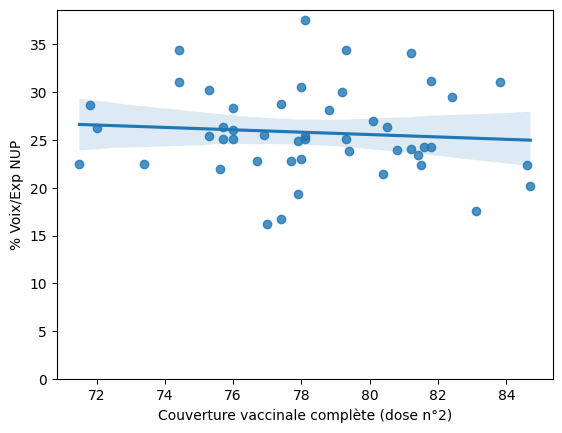

In [ ]:
df_nup_vax = getCorrVoixVaxPerc('NUP',tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp NUP", x="Couverture vaccinale complète (dose n°2)", data=df_nup_vax)
plt.ylim(0,)
getEsito(df_nup_vax['% Voix/Exp NUP'], df_nup_vax['Couverture vaccinale complète (dose n°2)'])
df_nup_vax[['% Voix/Exp NUP', 'Couverture vaccinale complète (dose n°2)']].corr()

#### 4.3.4.Correlazione tra LR e tasso di vaccinazione

The correlation is : very weak positive
The Pearson Correlation Coefficient is 0.13448655960560643  with a P-value of P = 0.3621167230429916 
There is no evidence that the correlation is significant


,% Voix/Exp LR,Couverture vaccinale complète (dose n°2)
% Voix/Exp LR,1.000000,0.134487
Couverture vaccinale complète (dose n°2),0.134487,1.000000


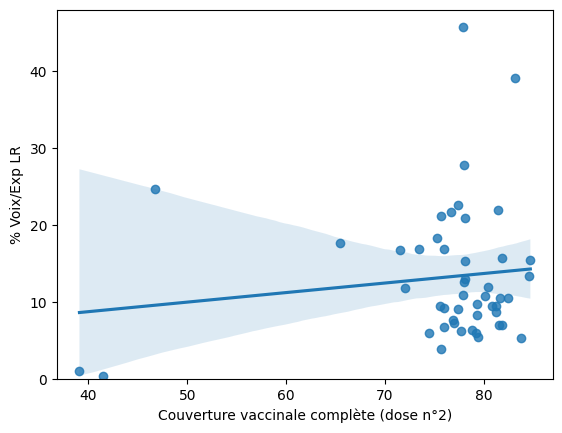

In [ ]:
df_lr_vax = getCorrVoixVaxPerc('LR',tasso_vacc_per_dip)
sns.regplot(y="% Voix/Exp LR", x="Couverture vaccinale complète (dose n°2)", data=df_lr_vax)
plt.ylim(0,)
getEsito(df_lr_vax['% Voix/Exp LR'], df_lr_vax['Couverture vaccinale complète (dose n°2)'])
df_lr_vax[['% Voix/Exp LR', 'Couverture vaccinale complète (dose n°2)']].corr()

## 5) Correlazione tra tasso di vaccinazione e reddito dichiarato pro capite

In [ ]:
df_merged = pd.merge(tasso_vacc_per_dip , df_pib , on='Libellé du département').sort_values(['Couverture vaccinale complète (dose n°2)'])
df_merged.head()

,Libellé du département,Couverture vaccinale complète (dose n°2),Code du département,Nom Officiel Région,PIB en valeur sont à prix courants
49,Haute-Corse,64.9,2B,Corse,23060
48,Corse-du-Sud,69.6,2A,Corse,26236
47,Haute-Savoie,71.5,74,Auvergne-Rhône-Alpes,36766
46,Alpes-de-Haute-Provence,71.8,4,Provence-Alpes-Côte d'Azur,24045
45,Bouches-du-Rhône,72.0,13,Provence-Alpes-Côte d'Azur,26598


The correlation is : weak negative
The Pearson Correlation Coefficient is -0.20730348110211524  with a P-value of P = 0.14859095954344348 
There is no evidence that the correlation is significant


,Couverture vaccinale complète (dose n°2),PIB en valeur sont à prix courants
Couverture vaccinale complète (dose n°2),1.000000,-0.207303
PIB en valeur sont à prix courants,-0.207303,1.000000


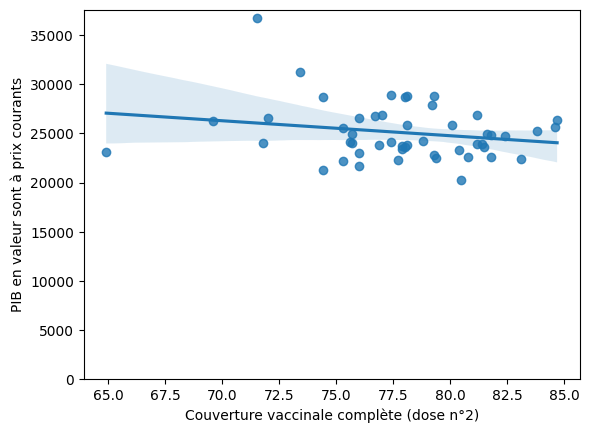

In [ ]:
sns.regplot(x="Couverture vaccinale complète (dose n°2)", y="PIB en valeur sont à prix courants", data=df_merged)
plt.ylim(0,)
getEsito(df_merged['Couverture vaccinale complète (dose n°2)'], df_merged['PIB en valeur sont à prix courants'])
df_merged[["Couverture vaccinale complète (dose n°2)", "PIB en valeur sont à prix courants"]].corr()

## 6) Correlazione tra tasso di vaccinazione e tasso di disoccupazione

In [ ]:
df_merged = pd.merge(tasso_vacc_per_dip , df_tcrd , on='Libellé du département').sort_values(['Couverture vaccinale complète (dose n°2)'])
df_merged.head()

,Libellé du département,Couverture vaccinale complète (dose n°2),Code du département,% Taux de chômage département T4
53,Guyane,30.7,973,10.7
52,Guadeloupe,39.1,971,19.3
51,Martinique,41.5,972,10.3
50,Haute-Corse,64.9,2B,6.4
49,La Réunion,65.4,974,17.2


The correlation is : strong negative
The Pearson Correlation Coefficient is -0.6161944229657973  with a P-value of P = 7.039818346614228e-07 
There is strong evidence that the correlation is significant


,Couverture vaccinale complète (dose n°2),% Taux de chômage département T4
Couverture vaccinale complète (dose n°2),1.000000,-0.616194
% Taux de chômage département T4,-0.616194,1.000000


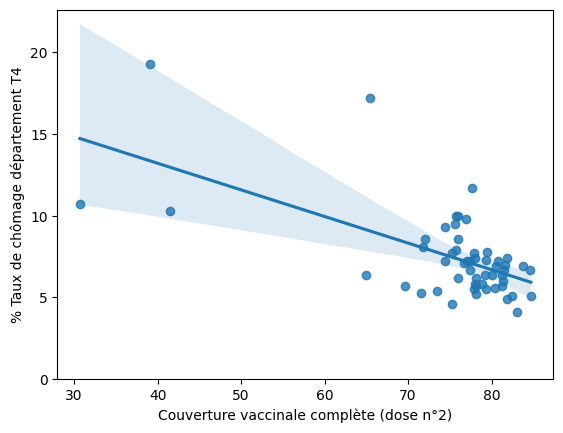

In [ ]:
sns.regplot(x="Couverture vaccinale complète (dose n°2)", y="% Taux de chômage département T4", data=df_merged)
plt.ylim(0,)
getEsito(df_merged['Couverture vaccinale complète (dose n°2)'], df_merged['% Taux de chômage département T4'])
df_merged[["Couverture vaccinale complète (dose n°2)", "% Taux de chômage département T4"]].corr()

## 7) Altre correlazioni

  #### Definizione funzione per ottenerre la % di voti di un candidato al pres-1 per dipartimento unito al dataframe da correlare





In [31]:
def getCorrVoixPercDataSet(nome,df_corr):
    df_filtered = df_1er_pres[df_1er_pres['Nom'] == nome]
    df_pres = df_filtered[['Nom', 'Libellé du département','Exprimés','Voix','% Voix/Exp']]
    percentuale_per_dipartimento = df_pres.groupby('Libellé du département')[['Exprimés','Voix']].sum().sort_values(['Libellé du département'])
    df = (percentuale_per_dipartimento['Voix'] / percentuale_per_dipartimento['Exprimés'])*100
    percentuale_per_dipartimento['% Voix/Exp'] = df
    percentuale_per_dipartimento = percentuale_per_dipartimento.rename(columns={'% Voix/Exp': '% Voix/Exp ' + nome})
    df_merged = pd.merge(percentuale_per_dipartimento, df_corr, on='Libellé du département')
    return df_merged

### 7.1.Correlazioni, in un dato dipartimento, tra candidati al primo turno delle presidenziali e inflazione

#### 7.1.1.Correlazione tra ZEMMOUR al primo turno delle presidenziali e inflazione

The correlation is : strong positive
The Pearson Correlation Coefficient is 0.6792864831026373  with a P-value of P = 5.850435919922237e-08 
There is strong evidence that the correlation is significant


,% Voix/Exp ZEMMOUR,Indice des prix dans le département
% Voix/Exp ZEMMOUR,1.000000,0.679286
Indice des prix dans le département,0.679286,1.000000


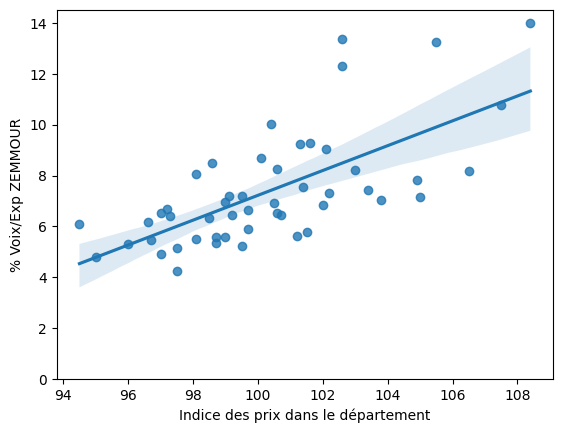

In [ ]:
nome = 'ZEMMOUR'
df_lp_inf = getCorrVoixPercDataSet(nome,df_inflazione)
sns.regplot(y= "% Voix/Exp "+nome, x= "Indice des prix dans le département", data=df_lp_inf)
plt.ylim(0,)
getEsito(df_lp_inf["% Voix/Exp "+nome], df_lp_inf['Indice des prix dans le département'])
df_lp_inf[["% Voix/Exp "+nome, 'Indice des prix dans le département']].corr()

#### 7.1.2.Correlazione tra POUTOU al primo turno delle presidenziali e inflazione

The correlation is : moderate negative
The Pearson Correlation Coefficient is -0.484324337645684  with a P-value of P = 0.0003654086540739099 
There is strong evidence that the correlation is significant


,% Voix/Exp POUTOU,Indice des prix dans le département
% Voix/Exp POUTOU,1.000000,-0.484324
Indice des prix dans le département,-0.484324,1.000000


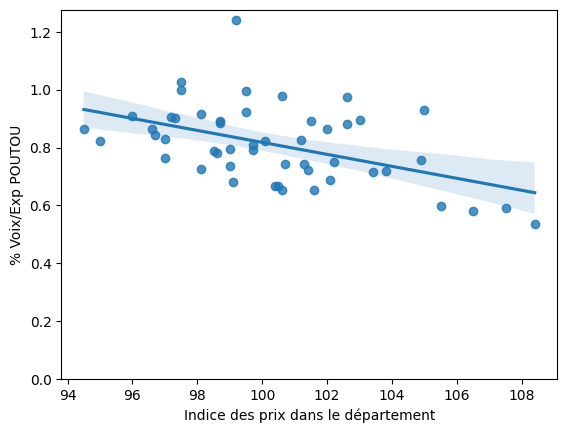

In [ ]:
nome = 'POUTOU'
df_lp_inf = getCorrVoixPercDataSet(nome,df_inflazione)
sns.regplot(y= "% Voix/Exp "+nome, x= "Indice des prix dans le département", data=df_lp_inf)
plt.ylim(0,)
getEsito(df_lp_inf["% Voix/Exp "+nome], df_lp_inf['Indice des prix dans le département'])
df_lp_inf[["% Voix/Exp "+nome, 'Indice des prix dans le département']].corr()

#### La correlazione è bassa negativa. Possiamo concludure che le persone residenti in dipartimenti con inflazione più alta tende a votare di meno macron

#### 7.1.3.Correlazione tra MACRON al primo turno delle presidenziali e inflazione

The correlation is : weak negative
The Pearson Correlation Coefficient is -0.3812026048802714  with a P-value of P = 0.006308421039440352 
There is moderate evidence that the correlation is significant


,% Voix/Exp MACRON,Indice des prix dans le département
% Voix/Exp MACRON,1.000000,-0.381203
Indice des prix dans le département,-0.381203,1.000000


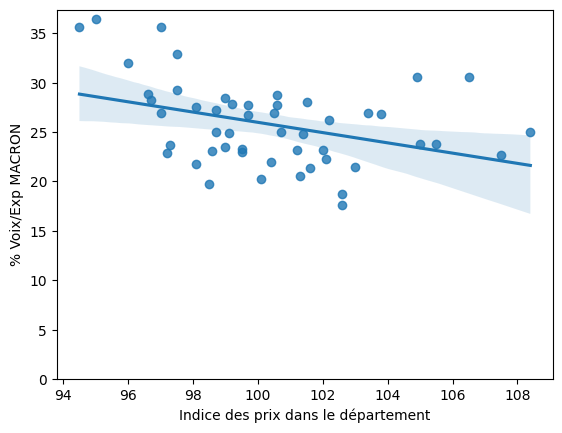

In [ ]:
nome = 'MACRON'       # weak negative - persone che abitano in dipartimenti con inflazione più alta tende a votare di meno macron
df_lp_inf = getCorrVoixPercDataSet(nome, df_inflazione)
sns.regplot(y= "% Voix/Exp "+nome, x= "Indice des prix dans le département", data=df_lp_inf)
plt.ylim(0,)
getEsito(df_lp_inf["% Voix/Exp "+nome], df_lp_inf['Indice des prix dans le département'])
df_lp_inf[["% Voix/Exp "+nome, 'Indice des prix dans le département']].corr()

### 7.2.Correlazioni tra voto candidato primo turno presidenziali e di poca istruzione

In [29]:
#lettura csv istruzione e pulizia
url_istr = 'https://raw.githubusercontent.com/manuelecapece/Unibas-Progetto-Big-data-2022-23/main/DataSet%20cleaned/istruzione.csv'
df_istr = pd.read_csv(url_istr)
df_istr.rename(columns={'Code': 'Code du département'}, inplace = True)
condizione = df_istr['taux de sous-éducation 2020'] == 'N/A - résultat non disponible'
df_istr.drop(df_istr[condizione].index, inplace = True)
df_istr[['Libellé du département','Code du département']] = df_istr[['Libellé du département','Code du département']].astype("string")
df_istr[['taux de sous-éducation 2020']] = df_istr[['taux de sous-éducation 2020']].astype("float64")
df_istr.drop(['Unnamed: 0'], axis = 1, inplace = True)
#df_istr.sort_values(by = ['taux de sous-éducation 2020'], ascending = False)

The correlation is : moderate negative
The Pearson Correlation Coefficient is -0.4941797670441136  with a P-value of P = 0.0001459488943827917 
There is strong evidence that the correlation is significant


,% Voix/Exp MACRON,taux de sous-éducation 2020
% Voix/Exp MACRON,1.00000,-0.49418
taux de sous-éducation 2020,-0.49418,1.00000


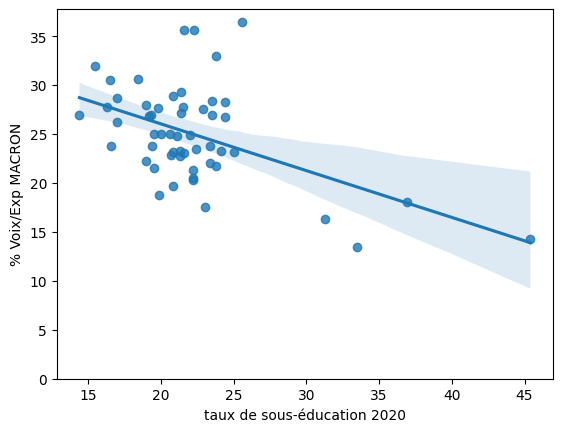

In [33]:
nome1 = 'LE PEN'              # very weak negative
nome2 = 'MÉLENCHON'           # strong positive - gente poco istruita vota Mélenchon
nome3 = 'MACRON'              # moderate negative - gente poco istruita tende a votare di meno macron
nome4 = 'PÉCRESSE'            # weak negative
nome5 = 'ARTHAUD'             # strong positive
nome6 = 'ZEMMOUR'             # weak negative
nome7 = 'LASSALLE'            # weak negative
nome8 = 'JADOT'               # strong negative
nome9 = 'HIDALGO'             # very weak negative
nome10 = 'ROUSSEL'            # moderate negative
nome11 = 'DUPONT-AIGNAN'      # very weak negative
nome12 = 'POUTOU'             # very weak positive
nome = nome3
df_lp_inf = getCorrVoixPercDataSet(nome, df_istr)
sns.regplot(y= "% Voix/Exp "+nome, x= "taux de sous-éducation 2020", data=df_lp_inf)
plt.ylim(0,)
getEsito(df_lp_inf["% Voix/Exp "+nome], df_lp_inf['taux de sous-éducation 2020'])
df_lp_inf[["% Voix/Exp "+nome, 'taux de sous-éducation 2020']].corr()

### 7.3.Correlazione tra tasso di vaccinazione e tasso di poca istruzione

In [ ]:
tasso_vacc_per_dip = (df_vax[['Libellé du département', 'Couverture vaccinale complète (dose n°2)']])
df_merged_vax_istr = pd.merge(df_istr, tasso_vacc_per_dip, on='Libellé du département')

The correlation is : strong negative
The Pearson Correlation Coefficient is -0.7036487623396904  with a P-value of P = 2.9477637952108113e-09 
There is strong evidence that the correlation is significant


,Couverture vaccinale complète (dose n°2),taux de sous-éducation 2020
Couverture vaccinale complète (dose n°2),1.000000,-0.703649
taux de sous-éducation 2020,-0.703649,1.000000


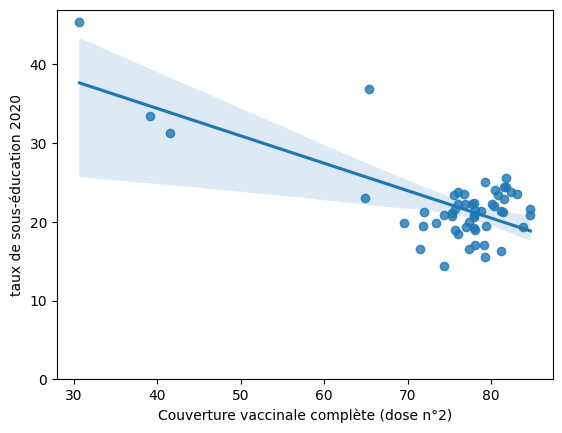

In [ ]:
sns.regplot(x="Couverture vaccinale complète (dose n°2)", y="taux de sous-éducation 2020", data=df_merged_vax_istr)
plt.ylim(0,)
getEsito(df_merged_vax_istr['Couverture vaccinale complète (dose n°2)'], df_merged_vax_istr['taux de sous-éducation 2020'])
df_merged_vax_istr[["Couverture vaccinale complète (dose n°2)", "taux de sous-éducation 2020"]].corr()

#le persone con una copertura vaccinale completa sono persone più istruite

**CORRELAZIONE TRA TASSO DI INFLAZIONE E PRESIDENZIALI PRIMO TURNO E LEGISLATIVE AL PRIMO TURNO**

In [ ]:
nome1 = 'ENS'       #very weak negative
nome2 = 'RN'        #very weak positive
nome3 = 'NUP'       #very weak negative
nome4 = 'LR'        #very weak positive
nome = nome4
df_lp_inf = getCorrVoixVaxPerc(nome, df_inflazione)
sns.regplot(y= "% Voix/Exp "+nome, x= "Indice des prix dans le département", data=df_lp_inf)
plt.ylim(0,)
getEsito(df_lp_inf["% Voix/Exp "+nome], df_lp_inf['Indice des prix dans le département'])
df_lp_inf[["% Voix/Exp "+nome, 'Indice des prix dans le département']].corr()

**CORRELAZIONE TRA TASSO D'INFLAZIONE E REDDITO PRO-CAPITE DICHIARATO**

In [ ]:
df_merged_inf_pib = pd.merge(df_inflazione , df_pib , on='Libellé du département')
df_merged_inf_pib

The correlation is : weak positive
The Pearson Correlation Coefficient is 0.3531165982295113  with a P-value of P = 0.011890814846638797 
There is moderate evidence that the correlation is significant


,Indice des prix dans le département,PIB en valeur sont à prix courants
Indice des prix dans le département,1.000000,0.353117
PIB en valeur sont à prix courants,0.353117,1.000000


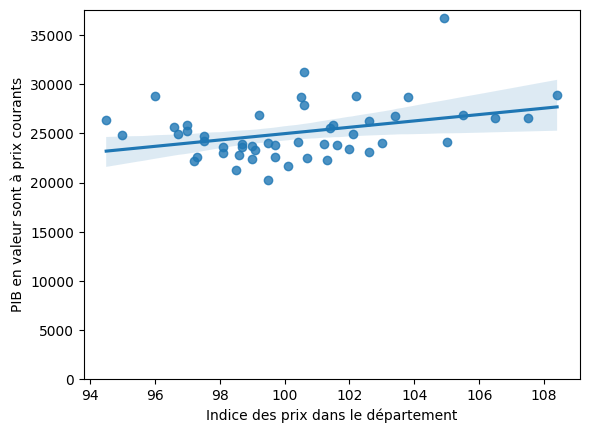

In [ ]:
sns.regplot(x="Indice des prix dans le département", y="PIB en valeur sont à prix courants", data=df_merged_inf_pib)
plt.ylim(0,)
getEsito(df_merged_inf_pib['Indice des prix dans le département'], df_merged_inf_pib['PIB en valeur sont à prix courants'])
df_merged_inf_pib[["Indice des prix dans le département", "PIB en valeur sont à prix courants"]].corr()


**CORRELAZIONE TRA PREZZO DEL CARBURANTE E VOTI SINGOLO CANDIDATO**

In [17]:
df_carburanti[['Adresse','Nom Commune','Carburant','Mise à jour','Code Officiel Département','Nom Officiel Département','Code Officiel Région','Nom Officiel Région']] =df_carburanti[['Adresse','Nom Commune','Carburant','Mise à jour','Code Officiel Département','Nom Officiel Département','Code Officiel Région','Nom Officiel Région']].astype("string")
df_carburanti['Mise à jour'] = pd.to_datetime(df_carburanti['Mise à jour'], utc=True)

In [ ]:
prix_carburantes= df_carburanti.rename(columns={'Nom Officiel Département':'Libellé du département', 'Code Officiel Département':'Code du département'})
pc_filtrata = prix_carburantes[['Code du département','Libellé du département','Prix Gazole','Prix SP95','Prix SP98','Prix GPLc','Prix E10','Prix E85']]
pc_filtrata.sort_values('Libellé du département')
mediaPrezziCarburanteDip= pc_filtrata.groupby('Libellé du département')[['Prix Gazole','Prix SP95','Prix SP98','Prix GPLc','Prix E10','Prix E85']].mean().sort_values(['Libellé du département'])
mediaPrezziCarburanteDip


The correlation is : weak negative
The Pearson Correlation Coefficient is -0.231207596457274  with a P-value of P = 0.10620082733473811 
There is no evidence that the correlation is significant


,Prix Gazole,% Voix/Exp MÉLENCHON
Prix Gazole,1.000000,-0.231208
% Voix/Exp MÉLENCHON,-0.231208,1.000000


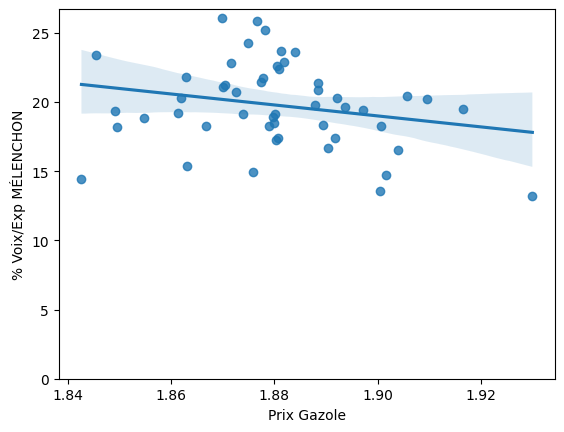

In [24]:
prezzo1 = 'Prix Gazole'
prezzo2 = 'Prix SP95'
prezzo3 = 'Prix GPLc'
prezzo4 = 'Prix E10'
prezzo5 = 'Prix E85'
nome1 = 'LE PEN'
nome2 = 'MÉLENCHON'
nome3 = 'MACRON'
nome = nome2
prezzo = prezzo1

df_carb_voti = getCorrVoixCsvPerc(nome, mediaPrezziCarburanteDip)
sns.regplot(x=prezzo, y="% Voix/Exp "+nome, data=df_carb_voti)
plt.ylim(0,)
getEsito(df_carb_voti[prezzo], df_carb_voti['% Voix/Exp '+nome])
df_carb_voti[[prezzo, "% Voix/Exp " + nome]].corr()

# Gazole: MACRON moderate negative (strong evidence),   LE PEN very weak positive,  MELENCHON weak negative
# GPLc :  MACRON moderate negative (moderate evidence), LE PEN very weak positive,  MELENCHON weak negative (moderate evidence)
# SP95:   MACRON very weak negative,                    LE PEN very weak negative,  MELENCHON weak negative
# E10:    MACRON weak negative (moderate evidence),     LE PEN very weak positive,  MELENCHON moderate negative (strong evidence)
# E85:    MACRON weak negative (moderate evidence),     LE PEN weak positive,       MELENCHON moderate negative (moderate evidence)

**CORRELAZIONE TRA PREZZO DEL CARBURANTE E VOTI PER DIPARTIMENTO**

The correlation is : moderate positive
The Pearson Correlation Coefficient is 0.44393079525041595  with a P-value of P = 0.002539876561370549 
There is moderate evidence that the correlation is significant


,% Voix/Exp LR,Prix Gazole
% Voix/Exp LR,1.000000,0.443931
Prix Gazole,0.443931,1.000000


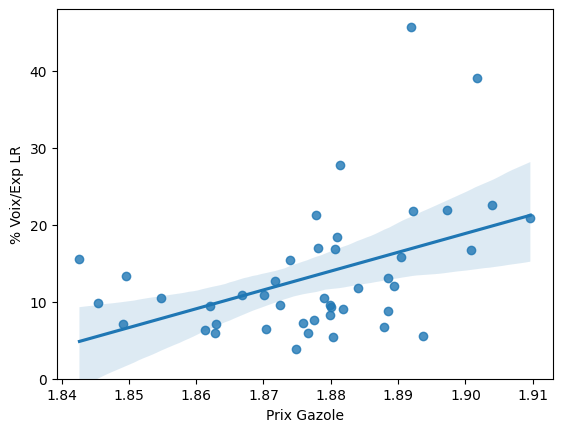

In [27]:
nome1 = 'ENS'       #very weak negative
nome2 = 'RN'        #very weak positive
nome3 = 'NUP'       #very weak negative
nome4 = 'LR'        #very weak positive
prezzo1 = 'Prix Gazole'
prezzo2 = 'Prix GPLc'
prezzo3 = 'Prix SP95'
prezzo4 = 'Prix E10'
prezzo5 = 'Prix E85'
nome = nome4
prezzo = prezzo1
df_carb_partiti = getCorrVoixVaxPerc(nome, mediaPrezziCarburanteDip)
sns.regplot(y= "% Voix/Exp "+nome, x= prezzo, data=df_carb_partiti)
plt.ylim(0,)
getEsito(df_carb_partiti["% Voix/Exp "+nome], df_carb_partiti[prezzo])
df_carb_partiti[["% Voix/Exp "+nome, prezzo]].corr()

# Gazole: ENS moderate negative (strong evidence ), RN weak negative,                     NUP None negative           LR moderate positive
# GPLc :  ENS very weak negative,                   RN None negative,                     NUP very weak negative      LR very weak negative
# SP95:   ENS weak negative,                        RN moderate negative,                 NUP very weak negative      LR None positive
# E10:    ENS very weak negative,                   RN very weak positive,                NUP very weak negative      LR very weak positive
# E85:    ENS very weak negative                    RN weak negative (moderate evidence), NUP very weak negative      LR None positive